# Jamie's Phase 1 Project Work!
### hooray 

In [1]:
# imports
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bomMovieGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [3]:
imdbNameBasics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

imdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

imdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

imdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

imdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [56]:
rtMovieInfo = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

rtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

tmdbMovies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tnMovieBudgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [5]:
# get list of all columns in files
allFiles = [bomMovieGross, imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,
           rtMovieInfo, rtReviews, tmdbMovies, tnMovieBudgets]

allCols = list(map(lambda x: x.columns, allFiles))
allCols

[Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 Index(['nconst', 'primary_name', 'birth_year', 'death_year',
        'primary_profession', 'known_for_titles'],
       dtype='object'),
 Index(['tconst', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres'],
       dtype='object'),
 Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
        'attributes', 'is_original_title'],
       dtype='object'),
 Index(['tconst', 'directors', 'writers'], dtype='object'),
 Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object'),
 Index(['tconst', 'averagerating', 'numvotes'], dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['Unnamed: 0', 'genre_ids', 'id', 'origin

In [ ]:
# add producer/director column to first table

In [22]:
# turn release date into date time object


5782

In [74]:
tmdbMovies.drop('Unnamed: 0', axis=1, inplace=True)
tmdbMovies

KeyError: "['Unnamed: 0'] not found in axis"

In [75]:
tmdbMovies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


# Cleaning tnMovieBudgets

In [57]:
# looking for more efficient way to do this
tnMovieBudgets['worldwide_gross'] = tnMovieBudgets['worldwide_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['domestic_gross'] = tnMovieBudgets['domestic_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['production_budget'] = tnMovieBudgets['production_budget'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets[['worldwide_gross','domestic_gross','production_budget']]
# tnMovieBudgets[tnMovieBudgets['worldwide_gross']=='$0'] = 'None'

,worldwide_gross,domestic_gross,production_budget
0,2776345279,760507625,425000000
1,1045663875,241063875,410600000
2,149762350,42762350,350000000
3,1403013963,459005868,330600000
4,1316721747,620181382,317000000
...,...,...,...
5777,0,0,7000
5778,240495,48482,6000
5779,1338,1338,5000
5780,0,0,1400


In [63]:
tnMovieBudgets['release_date'] = pd.to_datetime(tnMovieBudgets['release_date'], errors='coerce') # what does coerce do?
tnMovieBudgets['release_date']

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [102]:
# adding 'month_released' column
tnMovieBudgets['month_released'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['month_released'] = tnMovieBudgets['month_released'].apply(lambda x: int(x[5:7]))

# Graphs

Text(0, 0.5, 'Average Domestic Gross (Hundred Millions)')

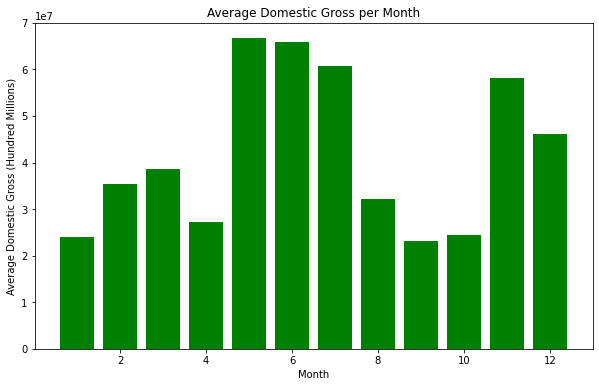

In [116]:
# comparing month released to mean gross
month_avg, ax = plt.subplots(figsize=(10,6))
x = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_dom_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['domestic_gross'].mean() for i in range(1,13)]                                                                                               
ax.bar(x, mean_dom_grosses, color='green')   
ax.set_title('Average Domestic Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Domestic Gross (Hundred Millions)')

In [ ]:
# comparing month released to mean gross per genre

In [ ]:
# stacked bar plot with month released domestic and foreign gross